<a href="https://colab.research.google.com/github/amlannag6/AndroidMalicious_ML_Model_Deployment-/blob/main/predModel_Static.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn import preprocessing
import torch
from sklearn import svm
from sklearn import tree
import pandas as pd
#from sklearn.externals import joblib
import pickle
import numpy as np
import seaborn as sns

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import brier_score_loss
from sklearn.metrics import roc_auc_score

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/amlannag6/AndroidMalicious_ML_Model_Deployment-/main/Prepared_DataSets/Dataset100_labled_fullTest.csv')
df.head()

,package_name,SEND_SMS,READ_PHONE_STATE,GET_ACCOUNTS,RECEIVE_SMS,READ_SMS,USE_CREDENTIALS,MANAGE_ACCOUNTS,WRITE_SMS,READ_SYNC_SETTINGS,...,defineClass,android.intent.action.PACKAGE_RESTARTED,android.intent.action.CALL_BUTTON,findClass,intent.action.RUN,android.intent.action.SET_WALLPAPER,Runtime.loadLibrary,android.intent.action.BATTERY_LOW,android.intent.action.ACTION_POWER_CONNECTED,Class
0,com.fungqyy.apk,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,NetLoop_VPN_5.0.4_apk-dl.com.apk,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"md.obsidian_1.1.0-38_minAPI21_arm64-v8a,armeab...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3168.apk,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,braga-store.apk,0,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.drop(columns = 'package_name', axis = 1, inplace = True )

In [ ]:
df = df.astype("int64")
df.Class.value_counts()

1    62
0    37
Name: Class, dtype: int64

In [ ]:
df.shape

(99, 207)

In [ ]:
pd.Series.sort_values(df[df.Class==1].sum(axis=0), ascending=False)[1:11]

android.intent.action.PACKAGE_REMOVED     250231
Binder                                    202229
android.intent.action.PACKAGE_REPLACED     79326
transact                                   66156
PackageInstaller                            7720
java.lang.Class.forName                     6750
android.os.Binder                           1645
onBind                                      1161
android.intent.action.PACKAGE_CHANGED       1108
bindService                                  490
dtype: int64

In [ ]:
pd.Series.sort_values(df[df.Class==0].sum(axis=0), ascending=False)[:10]

android.intent.action.PACKAGE_ADDED       161906
android.intent.action.PACKAGE_REMOVED     150352
Binder                                    121198
android.intent.action.PACKAGE_REPLACED     47644
transact                                   39630
PackageInstaller                            4719
java.lang.Class.forName                     4170
android.os.Binder                            983
onBind                                       732
android.intent.action.PACKAGE_CHANGED        683
dtype: int64

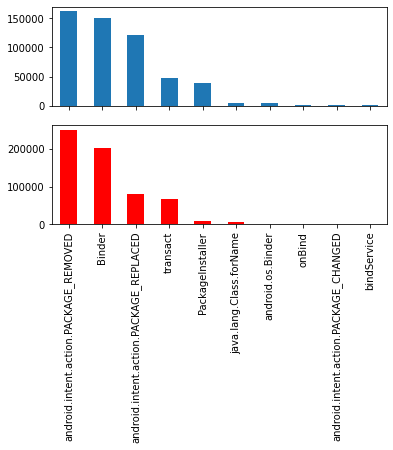

In [ ]:
import matplotlib.pyplot as plt
fig, axs =  plt.subplots(nrows=2, sharex=True)

pd.Series.sort_values(df[df.Class==0].sum(axis=0), ascending=False)[:10].plot.bar(ax=axs[0])
pd.Series.sort_values(df[df.Class==1].sum(axis=0), ascending=False)[1:11].plot.bar(ax=axs[1], color="red")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:206], df['Class'], test_size=0.20, random_state=42)

In [ ]:
def r2(y_true,y_pred):
    m_t_v=np.mean(y_true)
    numerator=0
    denominator=0
    for yt,yp in zip(y_true,y_pred):
        numerator +=(yt-yp)**2
        denominator +=(yt-m_t_v)**2
    r=numerator/denominator
    return 1-r

In [ ]:
def scoreset(y_true,y_pred):
    score_set=[]
    pred=y_pred
    y_test=y_true
    print("accuracy:",accuracy_score(y_test,pred))
    score_set.append(accuracy_score(y_test,pred))
    print("F1 Score:",f1_score(y_test,pred))
    score_set.append(f1_score(y_test,pred))
    print("Precision:",precision_score(y_test,pred))
    score_set.append(precision_score(y_test,pred))
    print("Recall:",recall_score(y_test,pred))
    score_set.append(recall_score(y_test,pred))
    return score_set

In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Read the csv test file

pred = clf.predict(X_test)
# accuracy
accuracy = accuracy_score(pred, y_test)
print(clf)
print(accuracy)
print(classification_report(pred, y_test, labels=None))
s=scoreset(y_test,pred)

DecisionTreeClassifier()
0.7
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.64      0.90      0.75        10

    accuracy                           0.70        20
   macro avg       0.74      0.70      0.69        20
weighted avg       0.74      0.70      0.69        20

accuracy: 0.7
F1 Score: 0.75
Precision: 0.9
Recall: 0.6428571428571429


In [ ]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train, y_train)
pred=xgb_clf.predict(X_test)
cm=confusion_matrix(y_test, pred)

accuracy = accuracy_score(y_test,pred)
print(accuracy)
print(classification_report(y_test,pred, labels=None))
s=scoreset(y_test,pred)

0.8
              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.92      0.79      0.85        14

    accuracy                           0.80        20
   macro avg       0.77      0.81      0.78        20
weighted avg       0.83      0.80      0.81        20

accuracy: 0.8
F1 Score: 0.8461538461538461
Precision: 0.9166666666666666
Recall: 0.7857142857142857


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
pred=clf.predict(X_test)
cm=confusion_matrix(y_test, pred)

accuracy = accuracy_score(y_test,pred)
print(accuracy)
print(classification_report(y_test,pred, labels=None))
print("cohen kappa score")
print(cohen_kappa_score(y_test, pred))
print(cm)
pred=pred.astype("int64")
s=scoreset(y_test,pred)

0.55
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         6
           1       0.73      0.57      0.64        14

    accuracy                           0.55        20
   macro avg       0.53      0.54      0.52        20
weighted avg       0.61      0.55      0.57        20

cohen kappa score
0.0625
[[3 3]
 [6 8]]
accuracy: 0.55
F1 Score: 0.64
Precision: 0.7272727272727273
Recall: 0.5714285714285714


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
rdF=RandomForestClassifier(n_estimators=250, max_depth=50,random_state=45)
rdF.fit(X_train,y_train)
pred=rdF.predict(X_test)
cm=confusion_matrix(y_test, pred)

accuracy = accuracy_score(y_test,pred)
print(rdF)
print(accuracy)
print(classification_report(y_test,pred, labels=None))
print("cohen kappa score")
print(cohen_kappa_score(y_test, pred))
print(cm)
pred=pred.astype("int64")
s=scoreset(y_test,pred)

RandomForestClassifier(max_depth=50, n_estimators=250, random_state=45)
0.85
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.92      0.86      0.89        14

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20

cohen kappa score
0.6590909090909092
[[ 5  1]
 [ 2 12]]
accuracy: 0.85
F1 Score: 0.888888888888889
Precision: 0.9230769230769231
Recall: 0.8571428571428571


Few things need to done 